### Import Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
#style.use('fivethirtyeight')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba-shot-logs/shot_logs.csv


### Read Data

In [3]:
df = pd.read_csv('../input/nba-shot-logs/shot_logs.csv')

### Data Exploration/Analysis

In [4]:
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

In [6]:
df.shape

(128069, 21)

In [7]:
df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


In [8]:
# Convert all column names to lowercase for ease of typing
df.columns = df.columns.str.lower()

In [9]:
len(df['player_name'].value_counts())

281

#### Game ID with the highest row_counts

In [10]:
df['game_id'].value_counts().sort_values(ascending = False)

21400248    198
21400375    194
21400440    193
21400266    191
21400695    190
           ... 
21400872     93
21400832     91
21400043     87
21400896     83
21400775     21
Name: game_id, Length: 904, dtype: int64

In [11]:
top_game = df[df['game_id'] ==21400695]
top_game

,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,...,shot_dist,pts_type,shot_result,closest_defender,closest_defender_player_id,close_def_dist,fgm,pts,player_name,player_id
8820,21400695,"JAN 29, 2015 - LAL vs. CHI",H,W,5,1,1,6:35,21.5,1,...,16.4,2,made,"Rose, Derrick",201565,6.5,1,2,carlos boozer,2430
8821,21400695,"JAN 29, 2015 - LAL vs. CHI",H,W,5,2,1,5:32,24.0,0,...,2.9,2,made,"Mirotic, Nikola",202703,2.2,1,2,carlos boozer,2430
8822,21400695,"JAN 29, 2015 - LAL vs. CHI",H,W,5,3,1,2:30,8.0,0,...,19.2,2,missed,"Gasol, Pau",2200,4.2,0,0,carlos boozer,2430
8823,21400695,"JAN 29, 2015 - LAL vs. CHI",H,W,5,4,1,1:02,11.0,3,...,11.1,2,made,"Gasol, Pau",2200,5.0,1,2,carlos boozer,2430
8824,21400695,"JAN 29, 2015 - LAL vs. CHI",H,W,5,5,1,0:44,19.4,0,...,5.3,2,missed,"Snell, Tony",203503,3.7,0,0,carlos boozer,2430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115489,21400695,"JAN 29, 2015 - CHI @ LAL",A,L,-5,3,3,9:29,24.0,0,...,0.2,2,missed,"Hill, Jordan",201941,0.2,0,0,joakim noah,201149
115490,21400695,"JAN 29, 2015 - CHI @ LAL",A,L,-5,4,3,9:26,24.0,0,...,2.9,2,made,"Sacre, Robert",203135,2.3,1,2,joakim noah,201149
115491,21400695,"JAN 29, 2015 - CHI @ LAL",A,L,-5,5,3,4:35,5.2,0,...,20.7,2,made,"Boozer, Carlos",2430,7.9,1,2,joakim noah,201149
115492,21400695,"JAN 29, 2015 - CHI @ LAL",A,L,-5,6,4,9:05,23.2,0,...,1.0,2,made,"Davis, Ed",202334,1.0,1,2,joakim noah,201149


#### Players in the top game

In [12]:
top_game['player_name'].value_counts()

derrick rose       26
jordan hill        22
wayne ellington    19
jimmy butler       17
aaron brooks       15
pau gasol          14
carlos boozer      13
tony snell         12
jeremy lin         11
wesley johnson      9
ed davis            7
joakim noah         7
taj gibson          6
robert sacre        6
kirk hinrich        4
nikola mirotic      2
Name: player_name, dtype: int64

#### Touch times VS Shot Results

<AxesSubplot:xlabel='shot_result', ylabel='touch_time'>

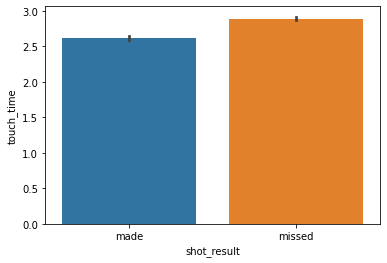

In [13]:
sns.barplot(x = df.shot_result, y=df.touch_time)

#### Sorting players by shots made:

In [14]:
df.groupby('player_name')['shot_number'].max().sort_values(ascending = False)

player_name
russell westbrook    38
kobe bryant          37
kyrie irving         36
mnta ellis           35
lebron james         35
                     ..
chris andersen        8
pablo prigioni        8
udonis haslem         7
joey dorsey           6
greg smith            4
Name: shot_number, Length: 281, dtype: int64

Russell Westbrook is the best player in terms of number of shots made, and Greg Smith, the least

#### Player/Defender pairs

In [15]:
df.groupby('player_name')['closest_defender','shot_number'].max().sort_values(by = 'shot_number', ascending = False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,closest_defender,shot_number
player_name,,
russell westbrook,"Zeller, Cody",38
kobe bryant,"Zeller, Tyler",37
kyrie irving,"Zeller, Tyler",36
mnta ellis,"Zeller, Tyler",35
lebron james,"Zeller, Cody",35
...,...,...
chris andersen,"Zeller, Tyler",8
pablo prigioni,"Williams, Mo",8
udonis haslem,"Zeller, Tyler",7


In [16]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#AAFFAA'])
cm_light = ListedColormap (['#FFAAAA', '#AAFFAA'])

Text(0, 0.5, 'touch_time')

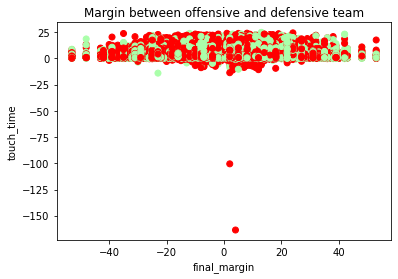

In [17]:
plt.scatter(df.final_margin, df.touch_time, c= [cm_bright.colors[i] for i in df.shot_result=='made'])
plt.title('Margin between offensive and defensive team')
plt.xlabel('final_margin')
plt.ylabel('touch_time')

Text(0, 0.5, 'close_def_dist')

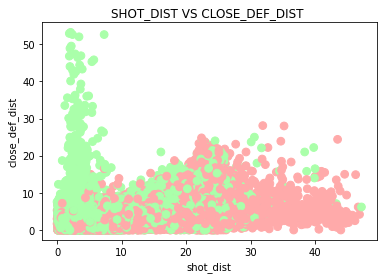

In [18]:
plt.scatter(df.shot_dist, df.close_def_dist, c= [cm_light.colors[i] for i in df.shot_result=='made'], s=60)
plt.title('SHOT_DIST VS CLOSE_DEF_DIST ')
plt.xlabel('shot_dist')
plt.ylabel('close_def_dist')

In [19]:
df['shot_result'].value_counts()

missed    70164
made      57905
Name: shot_result, dtype: int64

### Data Processing

In [20]:
df.isnull().sum()

game_id                          0
matchup                          0
location                         0
w                                0
final_margin                     0
shot_number                      0
period                           0
game_clock                       0
shot_clock                    5567
dribbles                         0
touch_time                       0
shot_dist                        0
pts_type                         0
shot_result                      0
closest_defender                 0
closest_defender_player_id       0
close_def_dist                   0
fgm                              0
pts                              0
player_name                      0
player_id                        0
dtype: int64

#### Drop rows with missing values

In [21]:
df.dropna(axis=1, inplace =True)

In [22]:
df['matchup']
df['game_clock']
df['touch_time'].min()

-163.6

####Dropping Outliers

##### A touch time of 163.6 is not possible. There're probably outliers in the touch_time column

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='touch_time'>

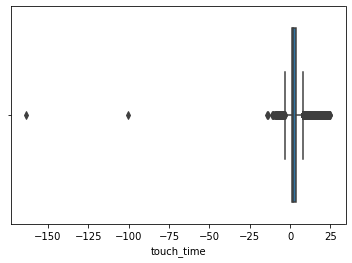

In [23]:
sns.boxplot(df['touch_time'])

In [24]:
Q1 = df['touch_time'].quantile(0.25)
Q3 = df['touch_time'].quantile(0.75)

IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

0.9
3.7
2.8000000000000003


In [25]:
Lower_Whisker = Q1 -  1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)

-3.3000000000000003 7.9


In [26]:
outliers = df[(df.touch_time < Lower_Whisker) | (df.touch_time > Upper_Whisker)]

In [27]:
df = df.drop(outliers.index)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='touch_time'>

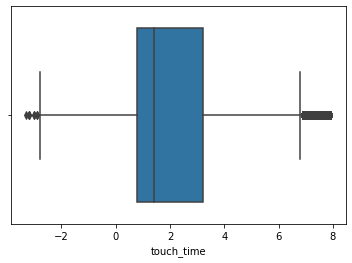

In [28]:
sns.boxplot(df['touch_time'])

#### There are still outliers in the dataset. Since it's impossible to have a negative touch time, we remove touch times less than 0

In [29]:
outliers = df[(df.touch_time < 0)]

In [30]:
df = df.drop(outliers.index)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='touch_time'>

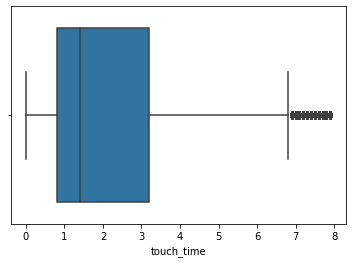

In [31]:
sns.boxplot(df['touch_time'])

In [32]:
df['location'].value_counts()

H    59897
A    59732
Name: location, dtype: int64

### Encode Categorical Variables

In [33]:
df['location'] = np.where(df['location'] == 'H', 1, 0)

In [34]:
df['w'] = np.where(df['w'] == 'W', 1, 0)

In [35]:
df.shot_result = df.shot_result.map({"made":1,"missed":0})

In [36]:
# converting the game_clock values to the seconds
df.game_clock = df.game_clock.apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119629 entries, 0 to 128068
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   game_id                     119629 non-null  int64  
 1   matchup                     119629 non-null  object 
 2   location                    119629 non-null  int64  
 3   w                           119629 non-null  int64  
 4   final_margin                119629 non-null  int64  
 5   shot_number                 119629 non-null  int64  
 6   period                      119629 non-null  int64  
 7   game_clock                  119629 non-null  int64  
 8   dribbles                    119629 non-null  int64  
 9   touch_time                  119629 non-null  float64
 10  shot_dist                   119629 non-null  float64
 11  pts_type                    119629 non-null  int64  
 12  shot_result                 119629 non-null  int64  
 13  closest_defend

In [38]:
df['pts'].value_counts()

0    65143
2    42982
3    11504
Name: pts, dtype: int64

In [39]:
df['matchup']

0         MAR 04, 2015 - CHA @ BKN
1         MAR 04, 2015 - CHA @ BKN
2         MAR 04, 2015 - CHA @ BKN
3         MAR 04, 2015 - CHA @ BKN
4         MAR 04, 2015 - CHA @ BKN
                    ...           
128064    OCT 29, 2014 - BKN @ BOS
128065    OCT 29, 2014 - BKN @ BOS
128066    OCT 29, 2014 - BKN @ BOS
128067    OCT 29, 2014 - BKN @ BOS
128068    OCT 29, 2014 - BKN @ BOS
Name: matchup, Length: 119629, dtype: object

In [40]:
# Extract game date and convert to datetime object
df['date'] = df['matchup'].str[:12]
df['date'] = pd.to_datetime(df['date'], format='%b %d, %Y')

In [41]:
df = df.set_index('date')

In [42]:
#df = df.drop(columns = ['game_id', 'matchup', 'closest_defender', 'closest_defender_player_id', 'player_name', 'player_id'])

In [43]:
df = df.sort_index()

In [44]:
df

,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,dribbles,touch_time,shot_dist,pts_type,shot_result,closest_defender,closest_defender_player_id,close_def_dist,fgm,pts,player_name,player_id
date,,,,,,,,,,,,,,,,,,,,
2014-10-28,21400002,"OCT 28, 2014 - DAL @ SAS",0,0,-1,2,1,478,0,1.7,12.0,2,1,"Green, Danny",201980,4.5,1,2,dirk nowtizski,1717
2014-10-28,21400002,"OCT 28, 2014 - DAL @ SAS",0,0,-1,8,4,262,2,3.4,3.7,2,0,"Diaw, Boris",2564,1.2,0,0,chandler parsons,202718
2014-10-28,21400002,"OCT 28, 2014 - DAL @ SAS",0,0,-1,9,4,165,0,0.9,27.0,3,1,"Ginobili, Manu",1938,7.9,1,3,chandler parsons,202718
2014-10-28,21400002,"OCT 28, 2014 - DAL @ SAS",0,0,-1,10,4,3,0,0.7,27.1,3,0,"Diaw, Boris",2564,4.2,0,0,chandler parsons,202718
2014-10-28,21400002,"OCT 28, 2014 - DAL @ SAS",0,0,-1,1,2,466,0,1.0,22.4,3,1,"Green, Danny",201980,5.4,1,3,richard jefferson,2210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-04,21400897,"MAR 04, 2015 - ORL vs. PHX",1,0,-5,9,2,217,0,0.9,19.6,2,0,"Len, Alex",203458,9.6,0,0,nikola vucevic,202696
2015-03-04,21400897,"MAR 04, 2015 - ORL vs. PHX",1,0,-5,8,2,342,0,0.6,3.5,2,1,"Knight, Brandon",202688,4.8,1,2,nikola vucevic,202696
2015-03-04,21400897,"MAR 04, 2015 - ORL vs. PHX",1,0,-5,7,1,200,0,0.9,2.6,2,1,"Wright, Brandan",201148,1.8,1,2,nikola vucevic,202696


In [45]:
#all_players = list(df['player_name'].unique())

### Visualize Feature Correlations

<AxesSubplot:>

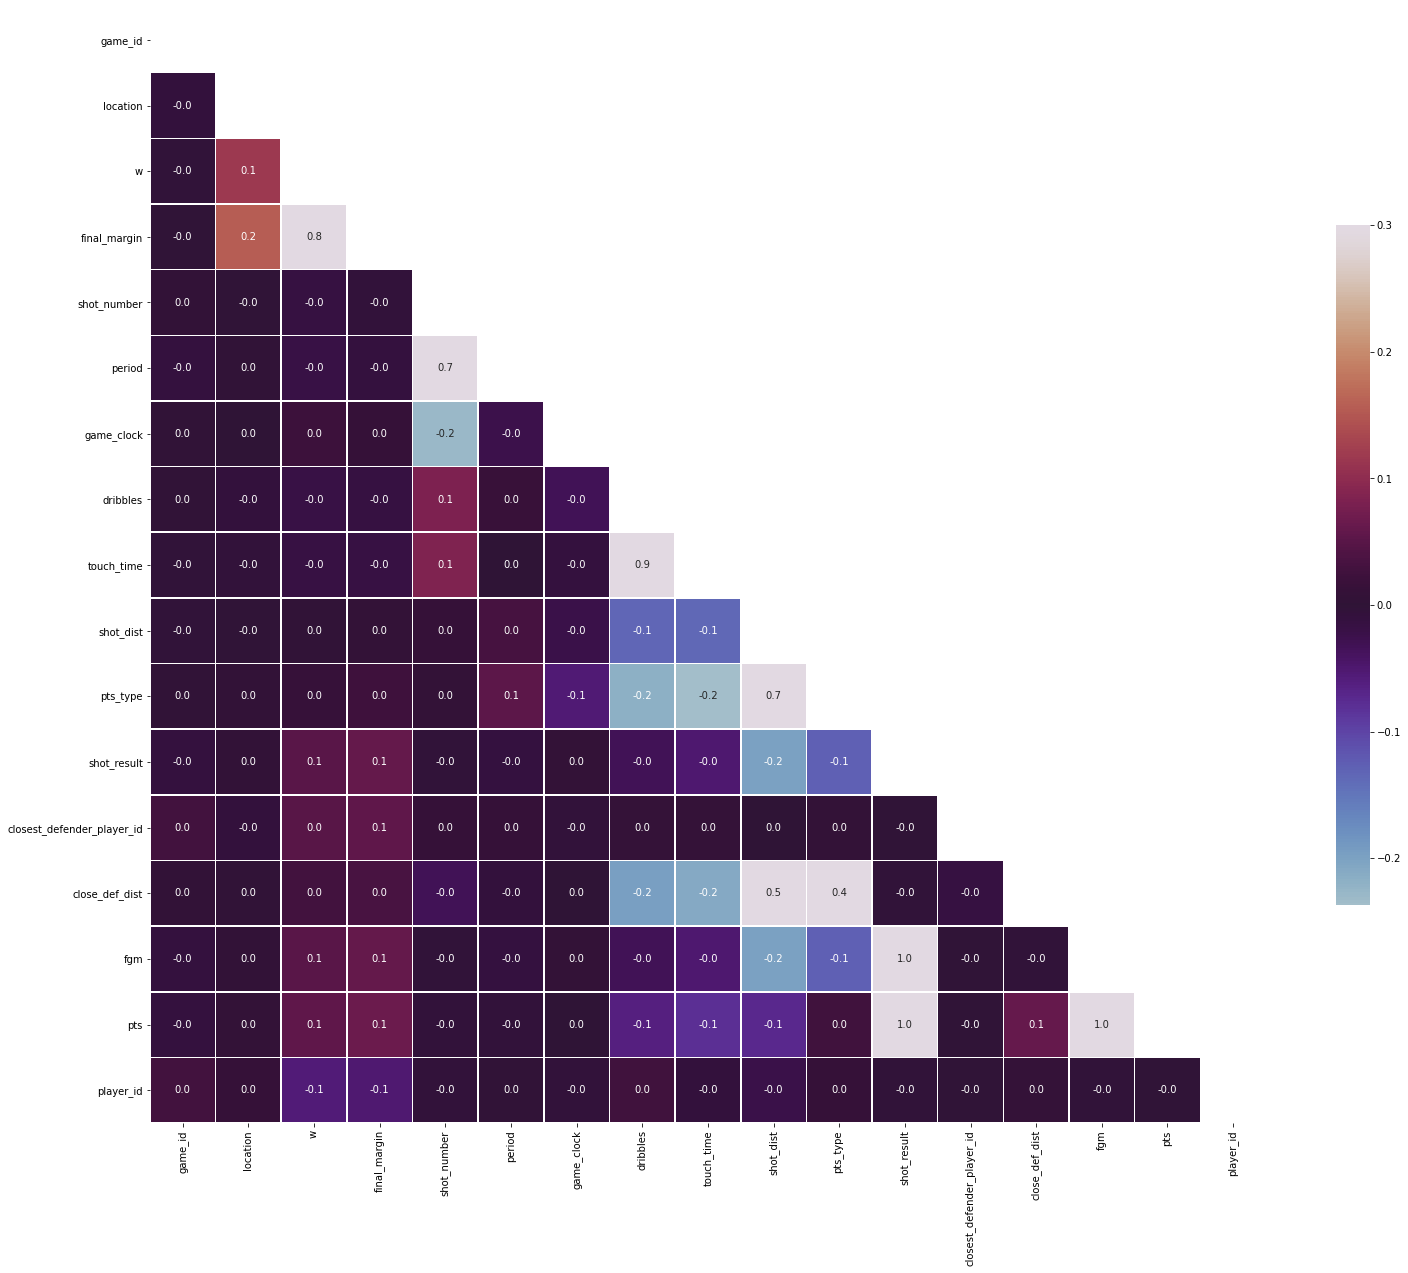

In [46]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, fmt=".1f", mask=mask, cmap='twilight', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Our target, shot result has a correlation of 1.0 with pts and fgm. We will drop both columns

Drop irrelevant and highly correlated Columns

In [47]:
df = df.drop(columns = ['player_id', 'player_name','matchup', 'game_id', 'closest_defender_player_id', 'closest_defender', 'fgm', 'pts'], axis=1)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119629 entries, 2014-10-28 to 2015-03-04
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   location        119629 non-null  int64  
 1   w               119629 non-null  int64  
 2   final_margin    119629 non-null  int64  
 3   shot_number     119629 non-null  int64  
 4   period          119629 non-null  int64  
 5   game_clock      119629 non-null  int64  
 6   dribbles        119629 non-null  int64  
 7   touch_time      119629 non-null  float64
 8   shot_dist       119629 non-null  float64
 9   pts_type        119629 non-null  int64  
 10  shot_result     119629 non-null  int64  
 11  close_def_dist  119629 non-null  float64
dtypes: float64(3), int64(9)
memory usage: 11.9 MB


In [49]:
df['shot_result'].value_counts()

0    65143
1    54486
Name: shot_result, dtype: int64

### Modeling

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X  = df.drop('shot_result', axis=1)
y = df['shot_result']

#### Train_Test_Splits

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

test accuracy:
0.6127225612304605
train accuracy:
0.6086816336278958
              precision    recall  f1-score   support

           0       0.63      0.71      0.67     19640
           1       0.59      0.49      0.53     16249

    accuracy                           0.61     35889
   macro avg       0.61      0.60      0.60     35889
weighted avg       0.61      0.61      0.61     35889



Predicted,0,1,All
Actual,,,
0,14031,5609,19640
1,8290,7959,16249
All,22321,13568,35889


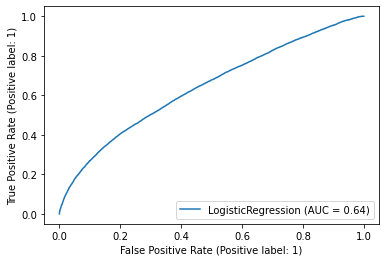

In [53]:
logistic = LogisticRegression()

logistic.fit(X_train, y_train)

prediction_lr = logistic.predict(X_test)

# Test score
score_logistic = logistic.score(X_test, y_test)
print('test accuracy:')
print(score_logistic)
print('train accuracy:')
print(logistic.score(X_train, y_train))

print(classification_report(y_test,prediction_lr))
metrics.plot_roc_curve(logistic, X_test, y_test)

confusion_matrix(y_test, prediction_lr)
pd.crosstab(y_test, prediction_lr, rownames = ['Actual'], colnames =['Predicted'], margins = True)

### Random Forest Classifier

test accuracy:
0.6196884839365823
train accuracy:
0.6154525913541915
              precision    recall  f1-score       support
0              0.614398  0.819145  0.702149  19640.000000
1              0.633965  0.378608  0.474088  16249.000000
accuracy       0.619688  0.619688  0.619688      0.619688
macro avg      0.624181  0.598876  0.588119  35889.000000
weighted avg   0.623257  0.619688  0.598893  35889.000000


Predicted,0,1,All
Actual,,,
0,16088,3552,19640
1,10097,6152,16249
All,26185,9704,35889


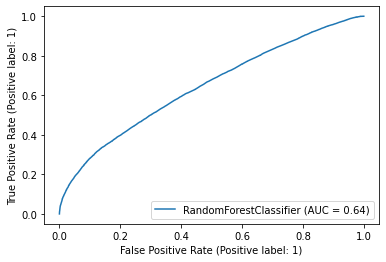

In [54]:
rf = RandomForestClassifier(max_features='auto',
                       n_estimators=10, random_state=42, max_depth=5, min_samples_leaf=100) 

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Test score
score_rf = rf.score(X_test, y_test)
print('test accuracy:')
print(score_rf)
print('train accuracy:')
print(rf.score(X_train, y_train))

#Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
print(df_classification_report)
metrics.plot_roc_curve(rf, X_test, y_test)

confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

### Gradient Boosting Classifier

test accuracy:
0.6266544066427039
train accuracy:
0.6293288750895629
              precision    recall  f1-score       support
0              0.617475  0.835132  0.709997  19640.000000
1              0.652799  0.374669  0.476090  16249.000000
accuracy       0.626654  0.626654  0.626654      0.626654
macro avg      0.635137  0.604901  0.593044  35889.000000
weighted avg   0.633468  0.626654  0.604094  35889.000000


Predicted,0,1,All
Actual,,,
0,16402,3238,19640
1,10161,6088,16249
All,26563,9326,35889


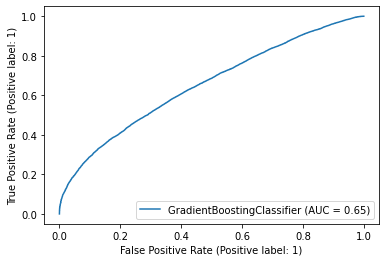

In [55]:
gb = GradientBoostingClassifier(max_features='auto',
                       n_estimators=100, random_state=42, max_depth=5, min_samples_leaf=100, learning_rate = 0.08) 

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

# Test score
score_gb = gb.score(X_test, y_test)
print('test accuracy:')
print(score_gb)
print('train accuracy:')
print(gb.score(X_train, y_train))

#Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
print(df_classification_report)
metrics.plot_roc_curve(gb, X_test, y_test)

confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

### Model Explainability with ALE(Accumulated Local Effects)

In [56]:
pip install alibi

     |████████████████████████████████| 307 kB 420 kB/s eta 0:00:01
     |████████████████████████████████| 93.8 MB 17.5 MB/s eta 0:00:01     |██████████████████              | 52.7 MB 6.6 MB/s eta 0:00:07


  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.3.2-py2.py3-none-any.whl size=93807573 sha256=6d77fdaf7213d2720b082b319a6ea8c17a20bd5ec2a85f6c57f2116b5a83204e
  Stored in directory: /root/.cache/pip/wheels/53/c2/ca/b2496a732bb10cc3d4adea066bb3f9f427fb22a4df7aebbd76
Successfully built spacy-lookups-data
Note: you may need to restart the kernel to use updated packages.


In [57]:
target_names = (['made', 'missed'])

In [58]:
target_names = np.array(target_names)

In [59]:
import alibi

In [60]:
from alibi.explainers import ALE, plot_ale
from alibi.explainers.ale import ALE, plot_ale

#### ALE on Logistic Regression in logit space

In [61]:
logit_fun_lr = logistic.decision_function

In [62]:
#logit_ale_lr = ALE(logit_fun_lr, feature_names=X.columns, target_names=target_names)

In [63]:
logit_ale_lr = ALE(logit_fun_lr, feature_names=X.columns)

In [64]:
logit_exp_lr = logit_ale_lr.explain(X_train.values)

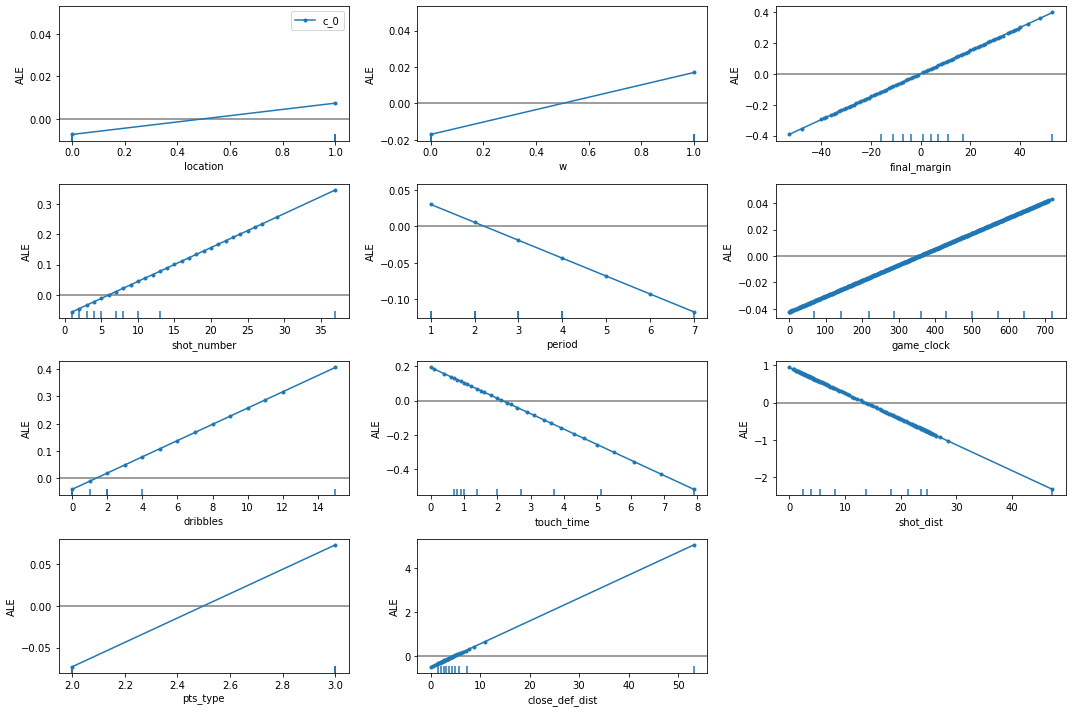

In [65]:
plot_ale(logit_exp_lr, fig_kw={'figwidth': 15, 'figheight': 10}, sharey=None);

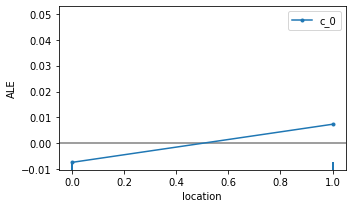

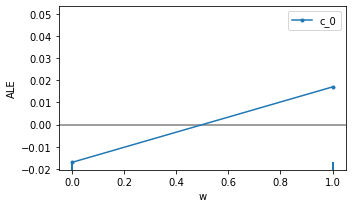

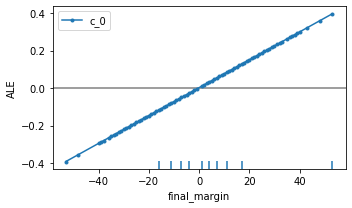

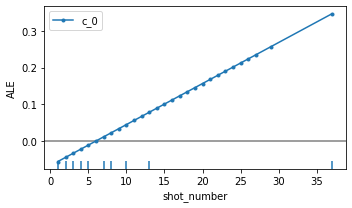

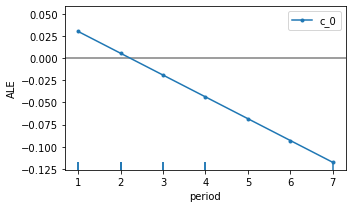

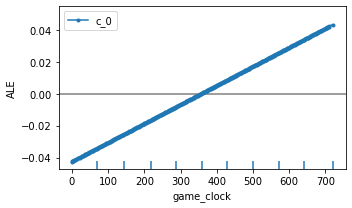

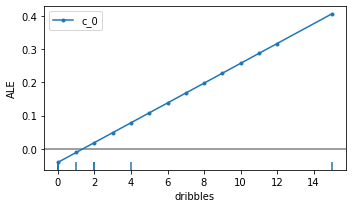

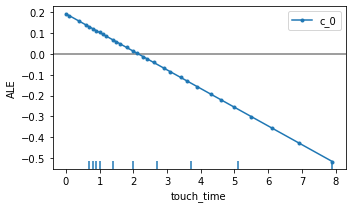

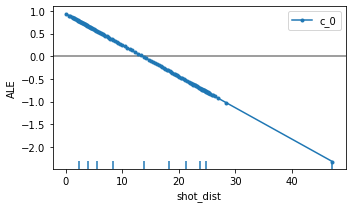

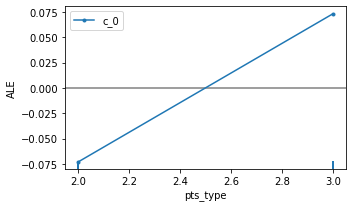

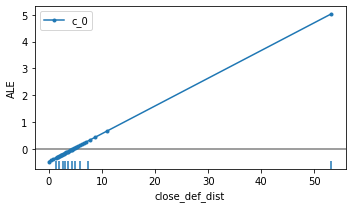

In [66]:
plot_ale(logit_exp_lr, features = ['location'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_lr, features = ['w'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_lr, features = ['final_margin'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_lr, features = ['shot_number'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_lr, features = ['period'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_lr, features = ['game_clock'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_lr, features = ['dribbles'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_lr, features = ['touch_time'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_lr, features = ['shot_dist'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_lr, features = ['pts_type'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_lr, features = ['close_def_dist'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);

In [100]:
df['close_def_dist'].value_counts()

1.9     2389
2.3     2367
2.1     2365
2.2     2364
2.0     2288
        ... 
32.5       1
44.0       1
36.1       1
32.3       1
53.2       1
Name: close_def_dist, Length: 299, dtype: int64

location - for locations 0(Away Games), the feature effect on the prediction is negative and for locations 1(Home Games), the feature effect on the prediction is positive
w - for games won (1), the feature has a positive effect on the average prediction, and for games lost(0), the feature has a negative effect on the average prediction
final margin - As final margin increases, it's effect on the average prediction also increases
shot number - We see a positive correlation between shot number and ALE values. An increase in shot number results leads to an increased effect on the average prediction
period - longer periods have negative effects on the average prediction, while shorter periods have positive effects
game clock - Game Clock is positively correlated with ALE values
dribbles - At dribbles = 1 t0 1.5, it's effect on average prediction is negative. But it's effect begins to increase form dribbles > 1.5
touch time - Smaller touch times have positive effects on the average prediction
shot distance - The ALE lines cross the 0 mark at ~10.4 which means that for instances of shot distance around ~10.4,  the feature effect on the prediction is the same as the average feature effect. On the other hand, going towards the extreme values of the feature, the model assigns  positive values for shot distances less than 10.4  and  negative penalties towards classifying shots as missed for shot distances greater than 10.4
points type - Point types of 2 afeect the average prediction negatively, while point tyoes of 3 have positive effects on average prediction
close defender distance - the farther the closest defenders distance, the more effect it has on average prediction

In [67]:
#plot_ale(logit_exp_lr)

#### ALE on Logistic Regression in probability space

In [68]:
proba_fun_lr = logistic.predict_proba

In [69]:
#proba_ale_lr = ALE(proba_fun_lr, feature_names=df.columns, target_names=target_names)
proba_ale_lr = ALE(proba_fun_lr, feature_names=X.columns)

In [70]:
proba_exp_lr = proba_ale_lr.explain(X_train.values)

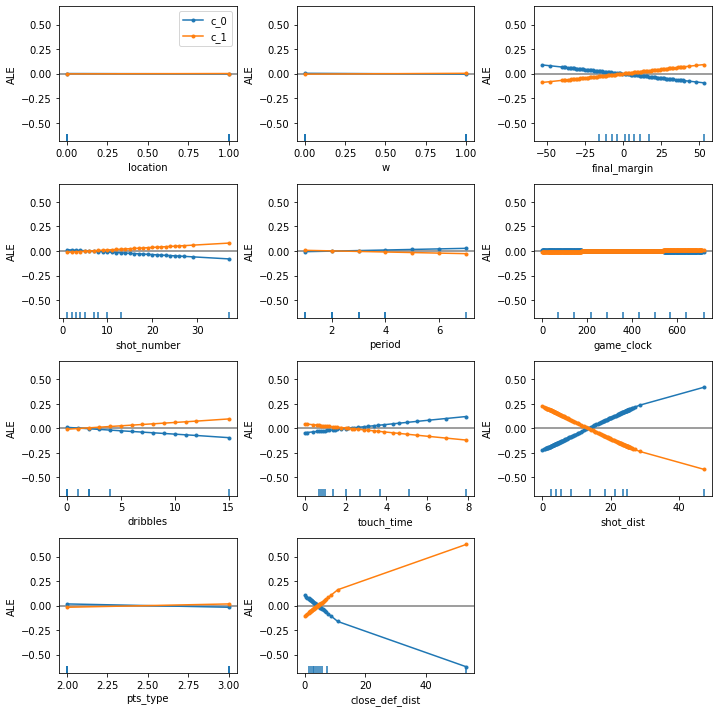

In [71]:
plot_ale(proba_exp_lr, fig_kw={'figwidth': 10, 'figheight': 10});

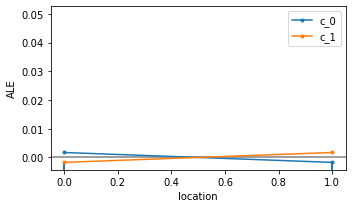

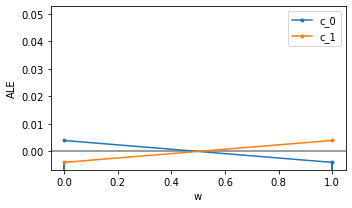

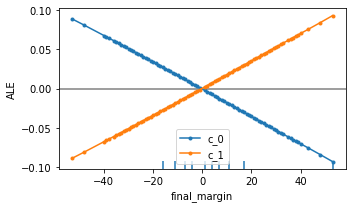

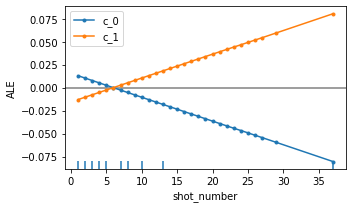

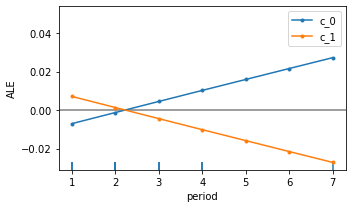

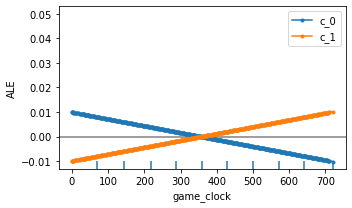

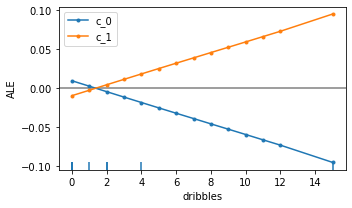

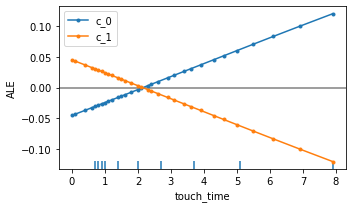

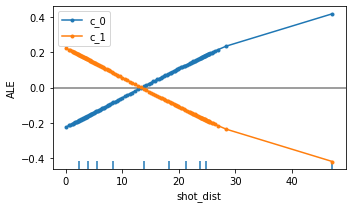

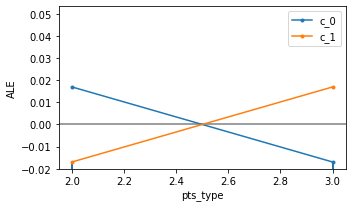

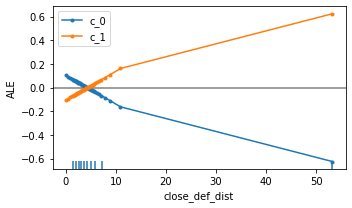

In [72]:
plot_ale(proba_exp_lr, features = ['location'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['w'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['final_margin'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['shot_number'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['period'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['game_clock'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['dribbles'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['touch_time'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['shot_dist'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['pts_type'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_lr, features = ['close_def_dist'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);

location - 
w - 
final margin - 
shot number - 
period - 
game clock - 
dribbles - 
touch time
shot distance - 
points type - 
close defender distance - 

### ALE for Random Forest

In [75]:
#logit_fun_rf = rf.decision_function
proba_fun_rf = rf.predict_proba

In [76]:
#logit_ale_rf = ALE(logit_fun_rf, feature_names=X.columns)
proba_ale_rf = ALE(proba_fun_rf, feature_names=X.columns)

In [77]:
#logit_exp_gb = logit_ale_gb.explain(X_train.values)
proba_exp_rf= proba_ale_rf.explain(X_train.values)

#### ALE on Random Forest in the probability space

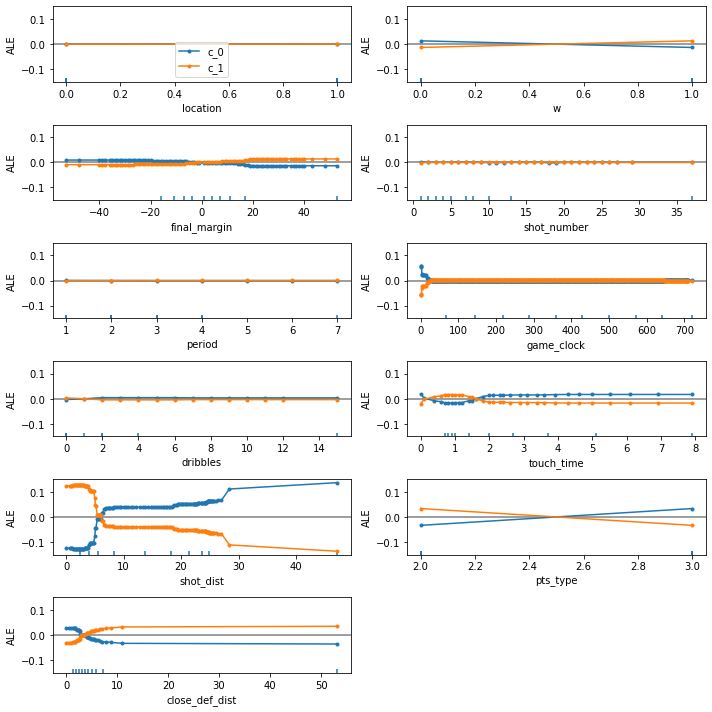

In [78]:
plot_ale(proba_exp_rf, n_cols=2, fig_kw={'figwidth': 10, 'figheight': 10});

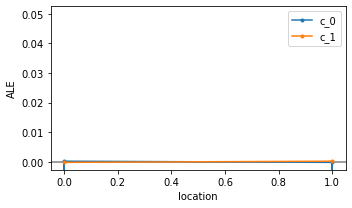

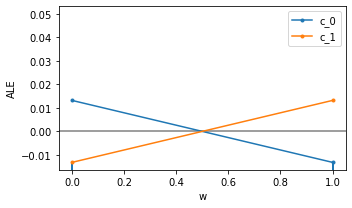

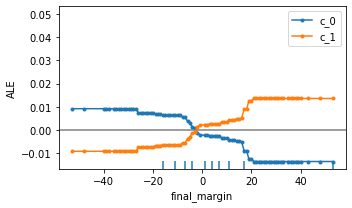

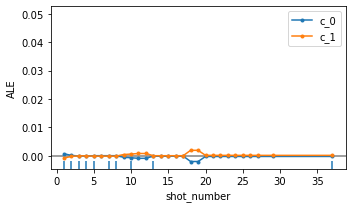

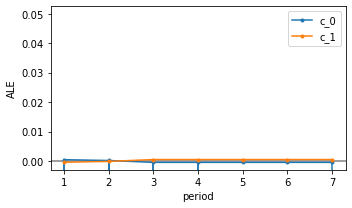

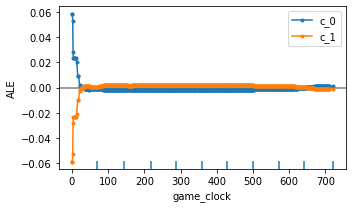

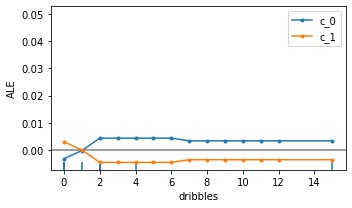

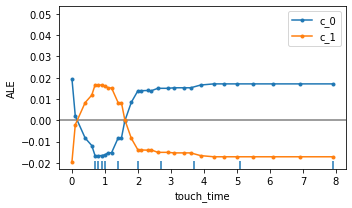

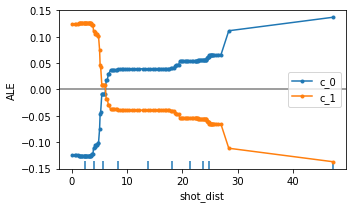

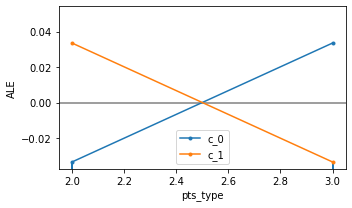

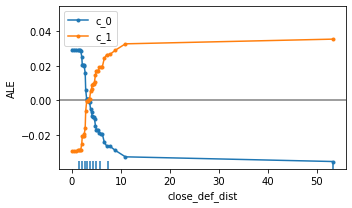

In [79]:
plot_ale(proba_exp_rf, features = ['location'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_rf, features = ['w'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_rf, features = ['final_margin'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_rf, features = ['shot_number'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_rf, features = ['period'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_rf, features = ['game_clock'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_rf, features = ['dribbles'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_rf, features = ['touch_time'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_rf, features = ['shot_dist'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_rf, features = ['pts_type'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_rf, features = ['close_def_dist'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);

location - Location seems to have no effect on the prediction

w - for won games(1), the model assigns positive probabilities towards classifying the instance as 1, and negative probabilities towards classifying the instance as 0. For lost games(0), the model assigns positive probabilities towards classifying the instance as 0, and negative probailities towards classifying the instance as 1

final margin - for final margins greater than 0, the model assigns positive probabilities towards classifying the instance as 1 and for final margins less than 0, the model assigns positive probabilities towards classifying the instance as 0

shot number - shot number does not seem to have much effect on the prediction

period - period has no effect on average prediction

game clock - A game clock = 0 to 10, the model assigns negative probabilities towards classifying the instance as 1, and positive probabilities towards classifying the instance as 0

dribbles - At dribbles = 0 to 1, the model assigns positive probabilities towards classifying the instance as 1, and at dribles >1, the probabilities become negavtive

touch time - At touch times between 0.1 to 1.8, the probabilities of classifying the instance as 1 is positive. It becomes negative at touch time>1.8

shot distance - Taking a closer look at the shot distance feature, we see that at a shot distance of 0, the model assigns a 0.25 probability towards classifying the instance as a 1(made shot)  and a -0.25 probability towards classifying the instance as a 0(missed shot). At a shot distance of ~15, the feature effect on the prediction is the same as the average feature effect. But for shot distances above 15, the model begins to assign negative probabilities towards classifying the instances as 1, and positive probabilities towards classifying the instances as 0 

points type - for point type =2, the model assigns a positive probabilities towards classifying the instance as 1, and for point type=3, the model assigns positive probabilities towards classifying the instance as 0

closest defender distance - Farther defender distances are assinged positive probabilities towards classifying the instance as 1

### ALE for gradient boosting

In [80]:
logit_fun_gb = gb.decision_function
proba_fun_gb = gb.predict_proba

In [81]:
logit_ale_gb = ALE(logit_fun_gb, feature_names=X.columns)
proba_ale_gb = ALE(proba_fun_gb, feature_names=X.columns)

In [82]:
logit_exp_gb = logit_ale_gb.explain(X_train.values)
proba_exp_gb = proba_ale_gb.explain(X_train.values)

#### ALE for Gradient Boosting in logit space

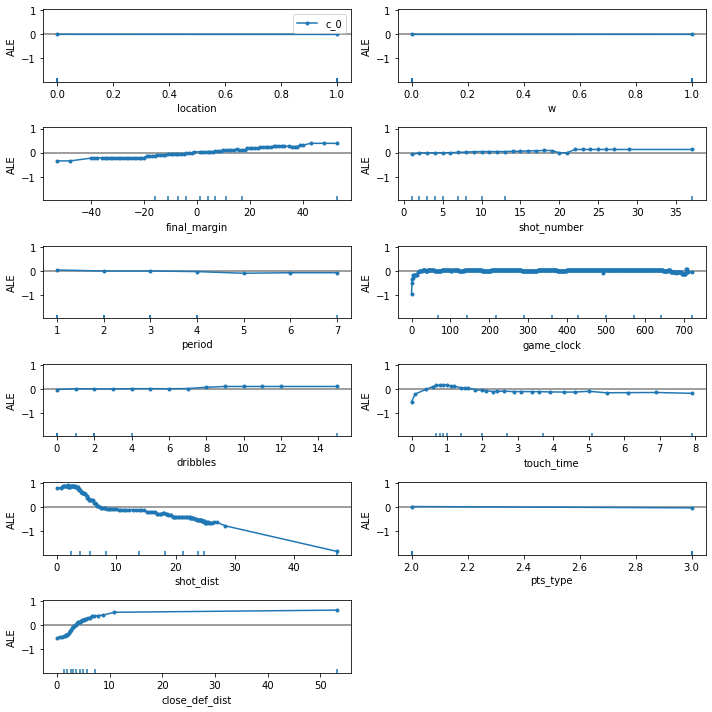

In [83]:
plot_ale(logit_exp_gb, n_cols=2, fig_kw={'figwidth': 10, 'figheight': 10});

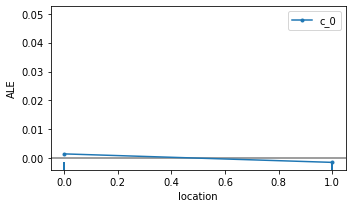

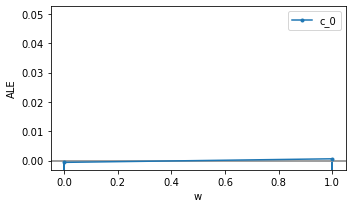

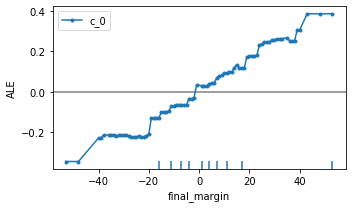

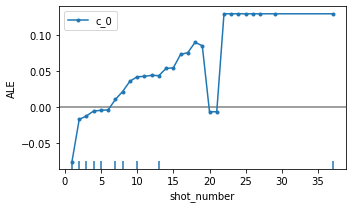

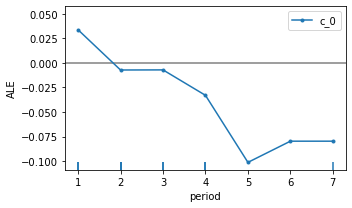

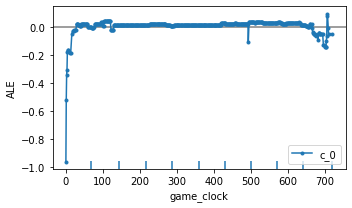

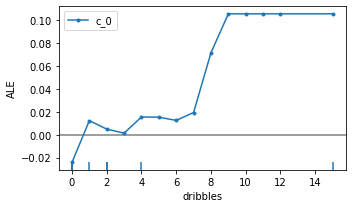

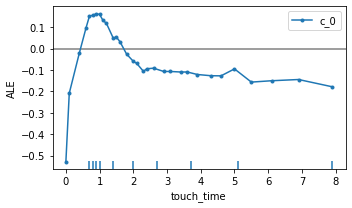

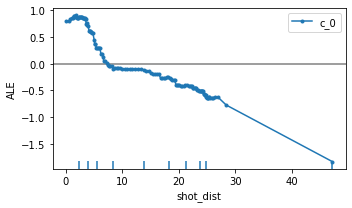

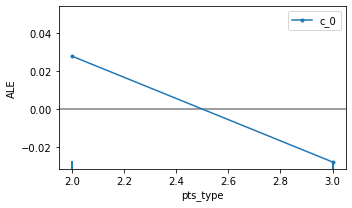

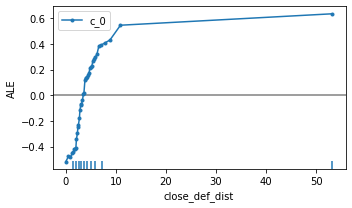

In [84]:
plot_ale(logit_exp_gb, features = ['location'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_gb, features = ['w'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_gb, features = ['final_margin'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_gb, features = ['shot_number'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_gb, features = ['period'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_gb, features = ['game_clock'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_gb, features = ['dribbles'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_gb, features = ['touch_time'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_gb, features = ['shot_dist'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_gb, features = ['pts_type'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(logit_exp_gb, features = ['close_def_dist'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);

location - 
w - 
final margin - 
shot number - 
period - 
game clock - 
dribbles - 
touch time
shot distance - 
points type - 
close defender distance - 

#### ALE for Gradient Boosting in probability space

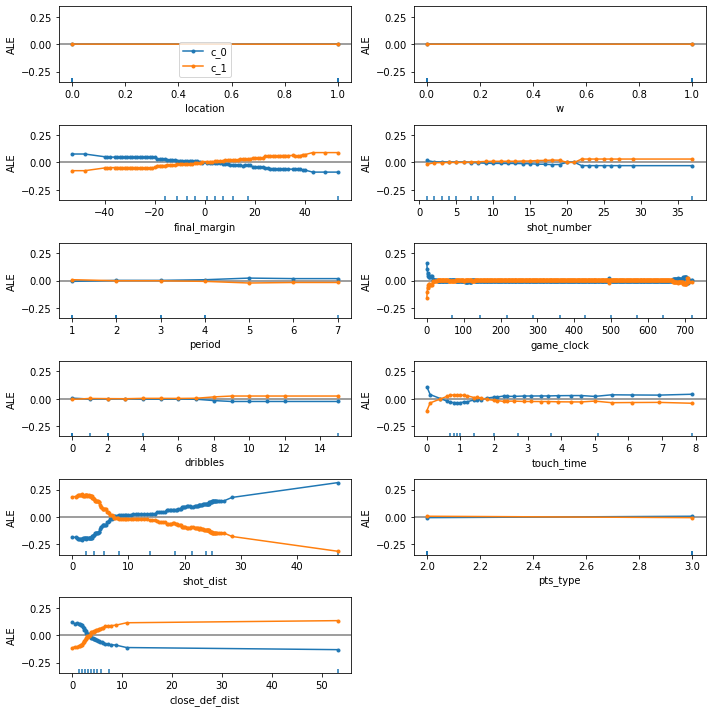

In [85]:
plot_ale(proba_exp_gb, n_cols=2, fig_kw={'figwidth': 10, 'figheight': 10});

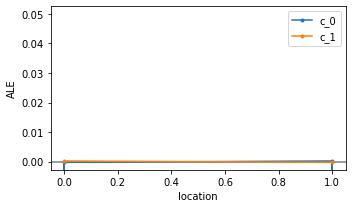

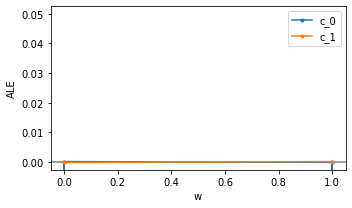

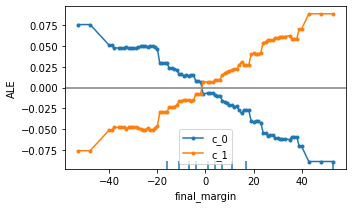

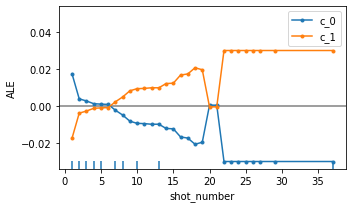

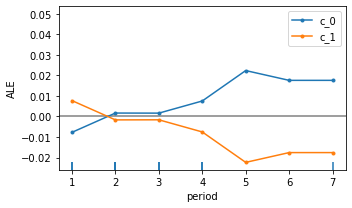

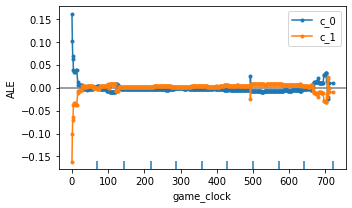

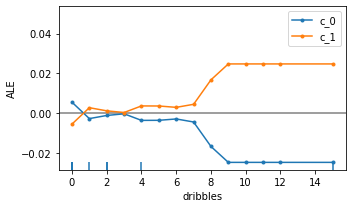

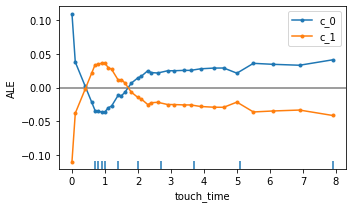

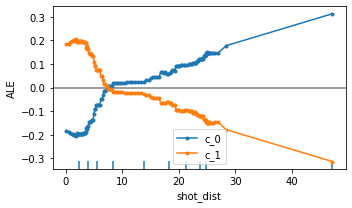

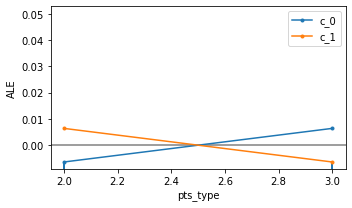

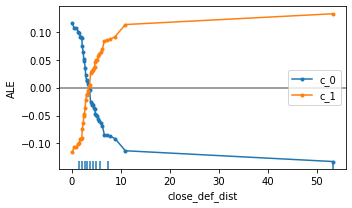

In [86]:
plot_ale(proba_exp_gb, features = ['location'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_gb, features = ['w'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_gb, features = ['final_margin'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_gb, features = ['shot_number'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_gb, features = ['period'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_gb, features = ['game_clock'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_gb, features = ['dribbles'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_gb, features = ['touch_time'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_gb, features = ['shot_dist'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_gb, features = ['pts_type'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);
plot_ale(proba_exp_gb, features = ['close_def_dist'], fig_kw={'figwidth': 5, 'figheight': 3}, sharey=None);

location - 
w - 
final margin - 
shot number - 
period - 
game clock - 
dribbles - 
touch time
shot distance - 
points type - 
close defender distance - 

shot distance looks like the feature with the most effect on our prediction. Let's see check the feature imortance plot for the gradient boosting classifier:

In [80]:
gb.feature_importances_

array([1.24920210e-03, 2.97361027e-04, 5.31596131e-02, 1.52419412e-02,
       6.22875700e-03, 5.20410297e-02, 9.86404254e-03, 9.22245612e-02,
       5.33535560e-01, 1.37235039e-03, 2.34785582e-01])

In [81]:
pd.DataFrame(gb.feature_importances_, index = X.columns)

,0
location,0.001249
w,0.000297
final_margin,0.053160
shot_number,0.015242
period,0.006229
game_clock,0.052041
dribbles,0.009864
touch_time,0.092225
shot_dist,0.533536
pts_type,0.001372


In [82]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    names = X.columns
    feature_names = np.array(names)
    #feature_names = X_train.columns
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'], palette = 'Blues')

    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

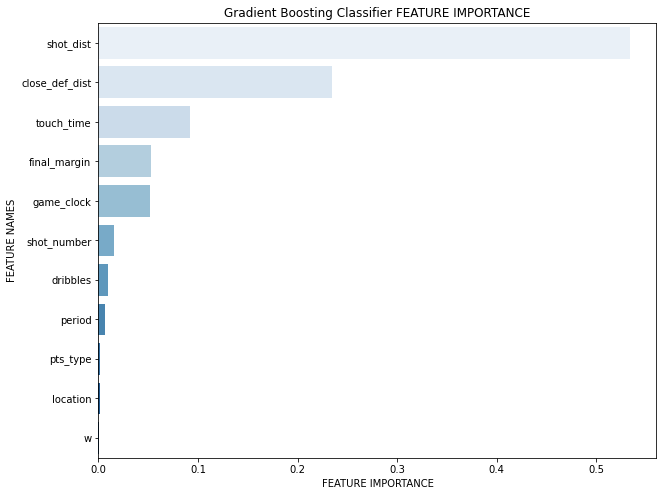

In [83]:
plot_feature_importance(gb.feature_importances_,X.columns,'Gradient Boosting Classifier')

### Comparing ALE between models

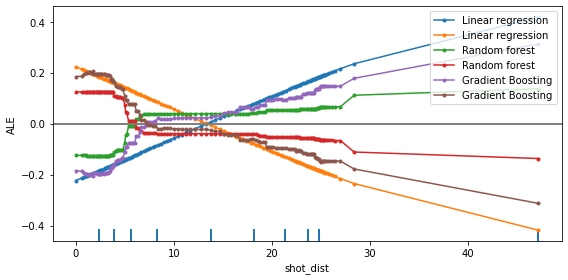

In [84]:
fig, ax = plt.subplots(1,1 , figsize=(8, 4), sharey='row');
plot_ale(proba_exp_lr, features=['shot_dist'], ax=ax, line_kw={'label': 'Linear regression'});
plot_ale(proba_exp_rf, features=['shot_dist'], ax=ax, line_kw={'label': 'Random forest'});
plot_ale(proba_exp_gb, features=['shot_dist'], ax=ax, line_kw={'label': 'Gradient Boosting'});

Text(0.5, 1.0, 'Effect of shot distance on shots made')

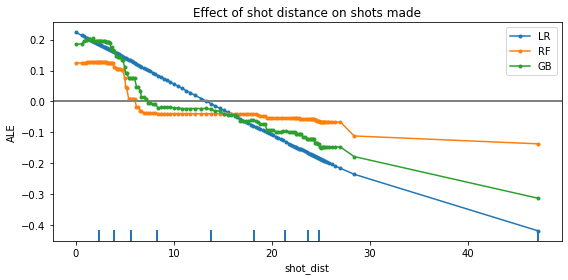

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), sharey='row');
plot_ale(proba_exp_lr, features=['shot_dist'], targets=[1], ax=ax, line_kw={'label': 'LR'});
plot_ale(proba_exp_rf, features=['shot_dist'], targets=[1], ax=ax, line_kw={'label': 'RF'});
plot_ale(proba_exp_gb, features=['shot_dist'], targets=[1], ax=ax, line_kw={'label': 'GB'});
plt.title('Effect of shot distance on shots made')

Text(0.5, 1.0, 'Effect of shot distance on shots missed')

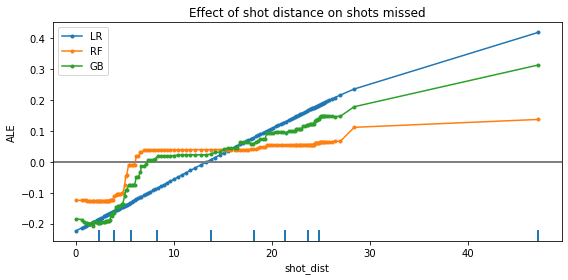

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), sharey='row');
plot_ale(proba_exp_lr, features=['shot_dist'], targets=[0], ax=ax, line_kw={'label': 'LR'});
plot_ale(proba_exp_rf, features=['shot_dist'], targets=[0], ax=ax, line_kw={'label': 'RF'});
plot_ale(proba_exp_gb, features=['shot_dist'], targets=[0], ax=ax, line_kw={'label': 'GB'});
plt.title('Effect of shot distance on shots missed')

# Outlier Detection

In [87]:
pip install alibi-detect

     |████████████████████████████████| 160 kB 1.3 MB/s eta 0:00:01


Note: you may need to restart the kernel to use updated packages.


In [88]:
from alibi_detect.od import IForest
from alibi_detect.datasets import fetch_kdd
from alibi_detect.utils.data import create_outlier_batch
from alibi_detect.utils.fetching import fetch_detector
from alibi_detect.utils.saving import save_detector, load_detector
from alibi_detect.utils.visualize import plot_instance_score, plot_roc

Assume that a model is trained on normal instances of the dataset (not outliers) and standardization is applied:

In [89]:
np.random.seed(0)
normal_batch = create_outlier_batch(X, y, n_samples=100000, perc_outlier=0)
X_train, y_train = normal_batch.data.astype('float'), normal_batch.target
print(X_train.shape, y_train.shape)
print('{}% outliers'.format(100 * y_train.mean()))

(100000, 11) (100000,)
0.0% outliers


In [90]:
mean, stdev = X_train.mean(axis=0), X_train.std(axis=0)

#### Apply standardization:

In [91]:
X_train = (X_train - mean) / stdev

### Load Outlier Detector (Isolation Forest)

In [92]:
od = IForest(threshold=None, n_estimators=100)

# train
od.fit(X_train)

Let’s assume we have some data which we know contains around 20% outliers

In [93]:
np.random.seed(0)
perc_outlier = 20
threshold_batch = create_outlier_batch(X, y, n_samples=1000, perc_outlier=perc_outlier)
X_threshold, y_threshold = threshold_batch.data.astype('float'), threshold_batch.target
X_threshold = (X_threshold - mean) / stdev
print('{}% outliers'.format(100 * y_threshold.mean()))

20.0% outliers


In [94]:
od.infer_threshold(X_threshold, threshold_perc=100-perc_outlier)
print('New threshold: {}'.format(od.threshold))

New threshold: 0.02746949318488868


### Detect Outliers

We now generate a batch of data with 10% outliers and detect the outliers in the batch.

In [95]:
np.random.seed(1)
outlier_batch = create_outlier_batch(X, y, n_samples=1000, perc_outlier=10)
X_outlier, y_outlier = outlier_batch.data.astype('float'), outlier_batch.target
X_outlier = (X_outlier - mean) / stdev
print(X_outlier.shape, y_outlier.shape)
print('{}% outliers'.format(100 * y_outlier.mean()))

(1000, 11) (1000,)
10.0% outliers


### Predict Outliers 

In [96]:
od_preds = od.predict(X_outlier, return_instance_score=True)

### Display Results

F1 score: 0.1164


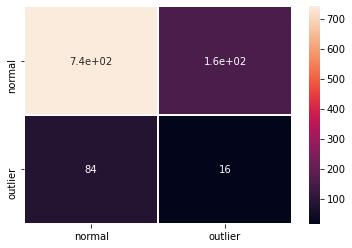

In [97]:
from sklearn.metrics import confusion_matrix, f1_score
labels = outlier_batch.target_names
y_pred = od_preds['data']['is_outlier']
f1 = f1_score(y_outlier, y_pred)
print('F1 score: {:.4f}'.format(f1))

cm = confusion_matrix(y_outlier, y_pred)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(df_cm, annot=True, cbar=True, linewidths=.5)
plt.show()

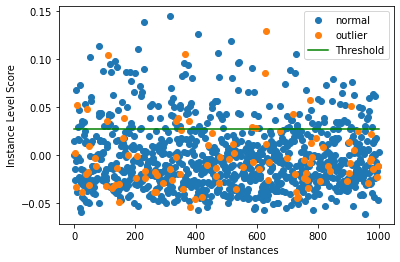

In [98]:
plot_instance_score(od_preds, y_outlier, labels, od.threshold)

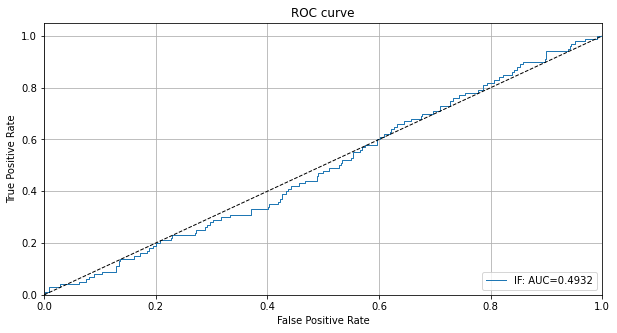

In [99]:
roc_data = {'IF': {'scores': od_preds['data']['instance_score'], 'labels': y_outlier}}
plot_roc(roc_data)

## Variable Auto-Encoders

Assume that a model is trained on normal instances of the dataset (not outliers) and standardization is applied:

In [100]:
np.random.seed(0)
normal_batch = create_outlier_batch(X, y, n_samples=100000, perc_outlier=0)
X_train, y_train = normal_batch.data.astype('float'), normal_batch.target
print(X_train.shape, y_train.shape)
print('{}% outliers'.format(100 * y_train.mean()))

(100000, 11) (100000,)
0.0% outliers


Apply standardization:

In [101]:
mean, stdev = X_train.mean(axis=0), X_train.std(axis=0)

In [102]:
X_train = (X_train - mean) / stdev

In [103]:
import tensorflow as tf
tf.keras.backend.clear_session()
from tensorflow.keras.layers import Dense, InputLayer
from alibi_detect.models.losses import elbo
from alibi_detect.od import OutlierVAE
from alibi_detect.utils.visualize import plot_instance_score, plot_feature_outlier_tabular, plot_roc

In [104]:
# define model, initialize and train  outlier detector

n_features = X_train.shape[1]
latent_dim = 2

encoder_net = tf.keras.Sequential(
      [
          InputLayer(input_shape=(n_features,)),
          Dense(20, activation=tf.nn.relu),
          Dense(15, activation=tf.nn.relu),
          Dense(7, activation=tf.nn.relu)
      ])

decoder_net = tf.keras.Sequential(
      [
          InputLayer(input_shape=(latent_dim,)),
          Dense(7, activation=tf.nn.relu),
          Dense(15, activation=tf.nn.relu),
          Dense(20, activation=tf.nn.relu),
          Dense(n_features, activation=None)
      ])
# initialize outlier detector
od = OutlierVAE(threshold=None,  # threshold for outlier score
                score_type='mse',  # use MSE of reconstruction error for outlier detection
                encoder_net=encoder_net,  # can also pass VAE model instead
                decoder_net=decoder_net,  # of separate encoder and decoder
                latent_dim=latent_dim,
                samples=5)
    # train
od.fit(X_train,
       loss_fn=elbo,
       cov_elbo=dict(sim=.01),
       epochs=20,
       verbose=True)

1563/1563 [=] - 50s 32ms/step - loss: 15592.2342


In [105]:
np.random.seed(0)
perc_outlier = 10
threshold_batch = create_outlier_batch(X, y, n_samples=1000, perc_outlier=perc_outlier)
X_threshold, y_threshold = threshold_batch.data.astype('float'), threshold_batch.target
X_threshold = (X_threshold - mean) / stdev
print('{}% outliers'.format(100 * y_threshold.mean()))

10.0% outliers


In [106]:
od.infer_threshold(X_threshold, threshold_perc=100-perc_outlier)
print('New threshold: {}'.format(od.threshold))

New threshold: 0.5131572334307674


### Detect Outliers 

We now generate a batch of data with 10% outliers and detect the outliers in the batch.

In [107]:
np.random.seed(1)
outlier_batch = create_outlier_batch(X, y, n_samples=1000, perc_outlier=10)
X_outlier, y_outlier = outlier_batch.data.astype('float'), outlier_batch.target
X_outlier = (X_outlier - mean) / stdev
print(X_outlier.shape, y_outlier.shape)
print('{}% outliers'.format(100 * y_outlier.mean()))

(1000, 11) (1000,)
10.0% outliers


### Predict Outliers 

In [108]:
od_preds = od.predict(X_outlier,
                      outlier_type='instance',    # use 'feature' or 'instance' level
                      return_feature_score=True,  # scores used to determine outliers
                      return_instance_score=True)
print(list(od_preds['data'].keys()))

['instance_score', 'feature_score', 'is_outlier']


### Display Results 

F1 score: 0.1015


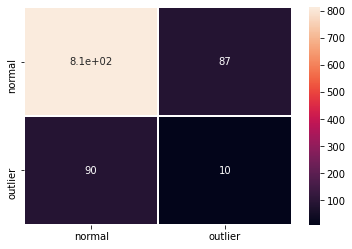

In [109]:
labels = outlier_batch.target_names
y_pred = od_preds['data']['is_outlier']
f1 = f1_score(y_outlier, y_pred)
print('F1 score: {:.4f}'.format(f1))
cm = confusion_matrix(y_outlier, y_pred)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(df_cm, annot=True, cbar=True, linewidths=.5)
plt.show()

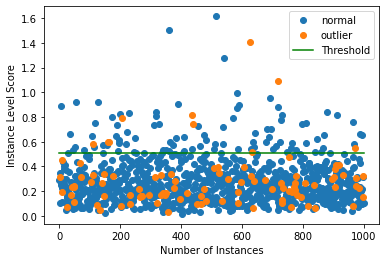

In [110]:
plot_instance_score(od_preds, y_outlier, labels, od.threshold)

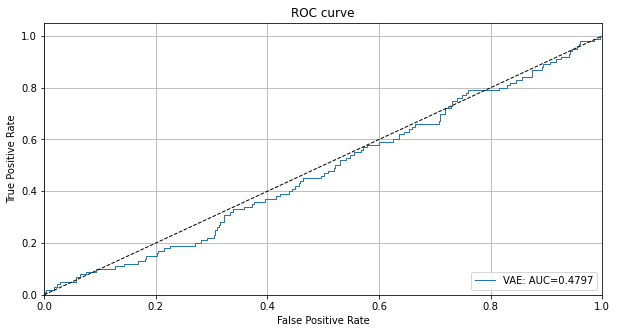

In [111]:
roc_data = {'VAE': {'scores': od_preds['data']['instance_score'], 'labels': y_outlier}}
plot_roc(roc_data)

In [112]:
X_recon = od.vae(X_outlier).numpy()  # reconstructed instances by the VAE

### Investigate instance-level Outlier

We can now take a closer look at some of the individual predictions on X_outlier

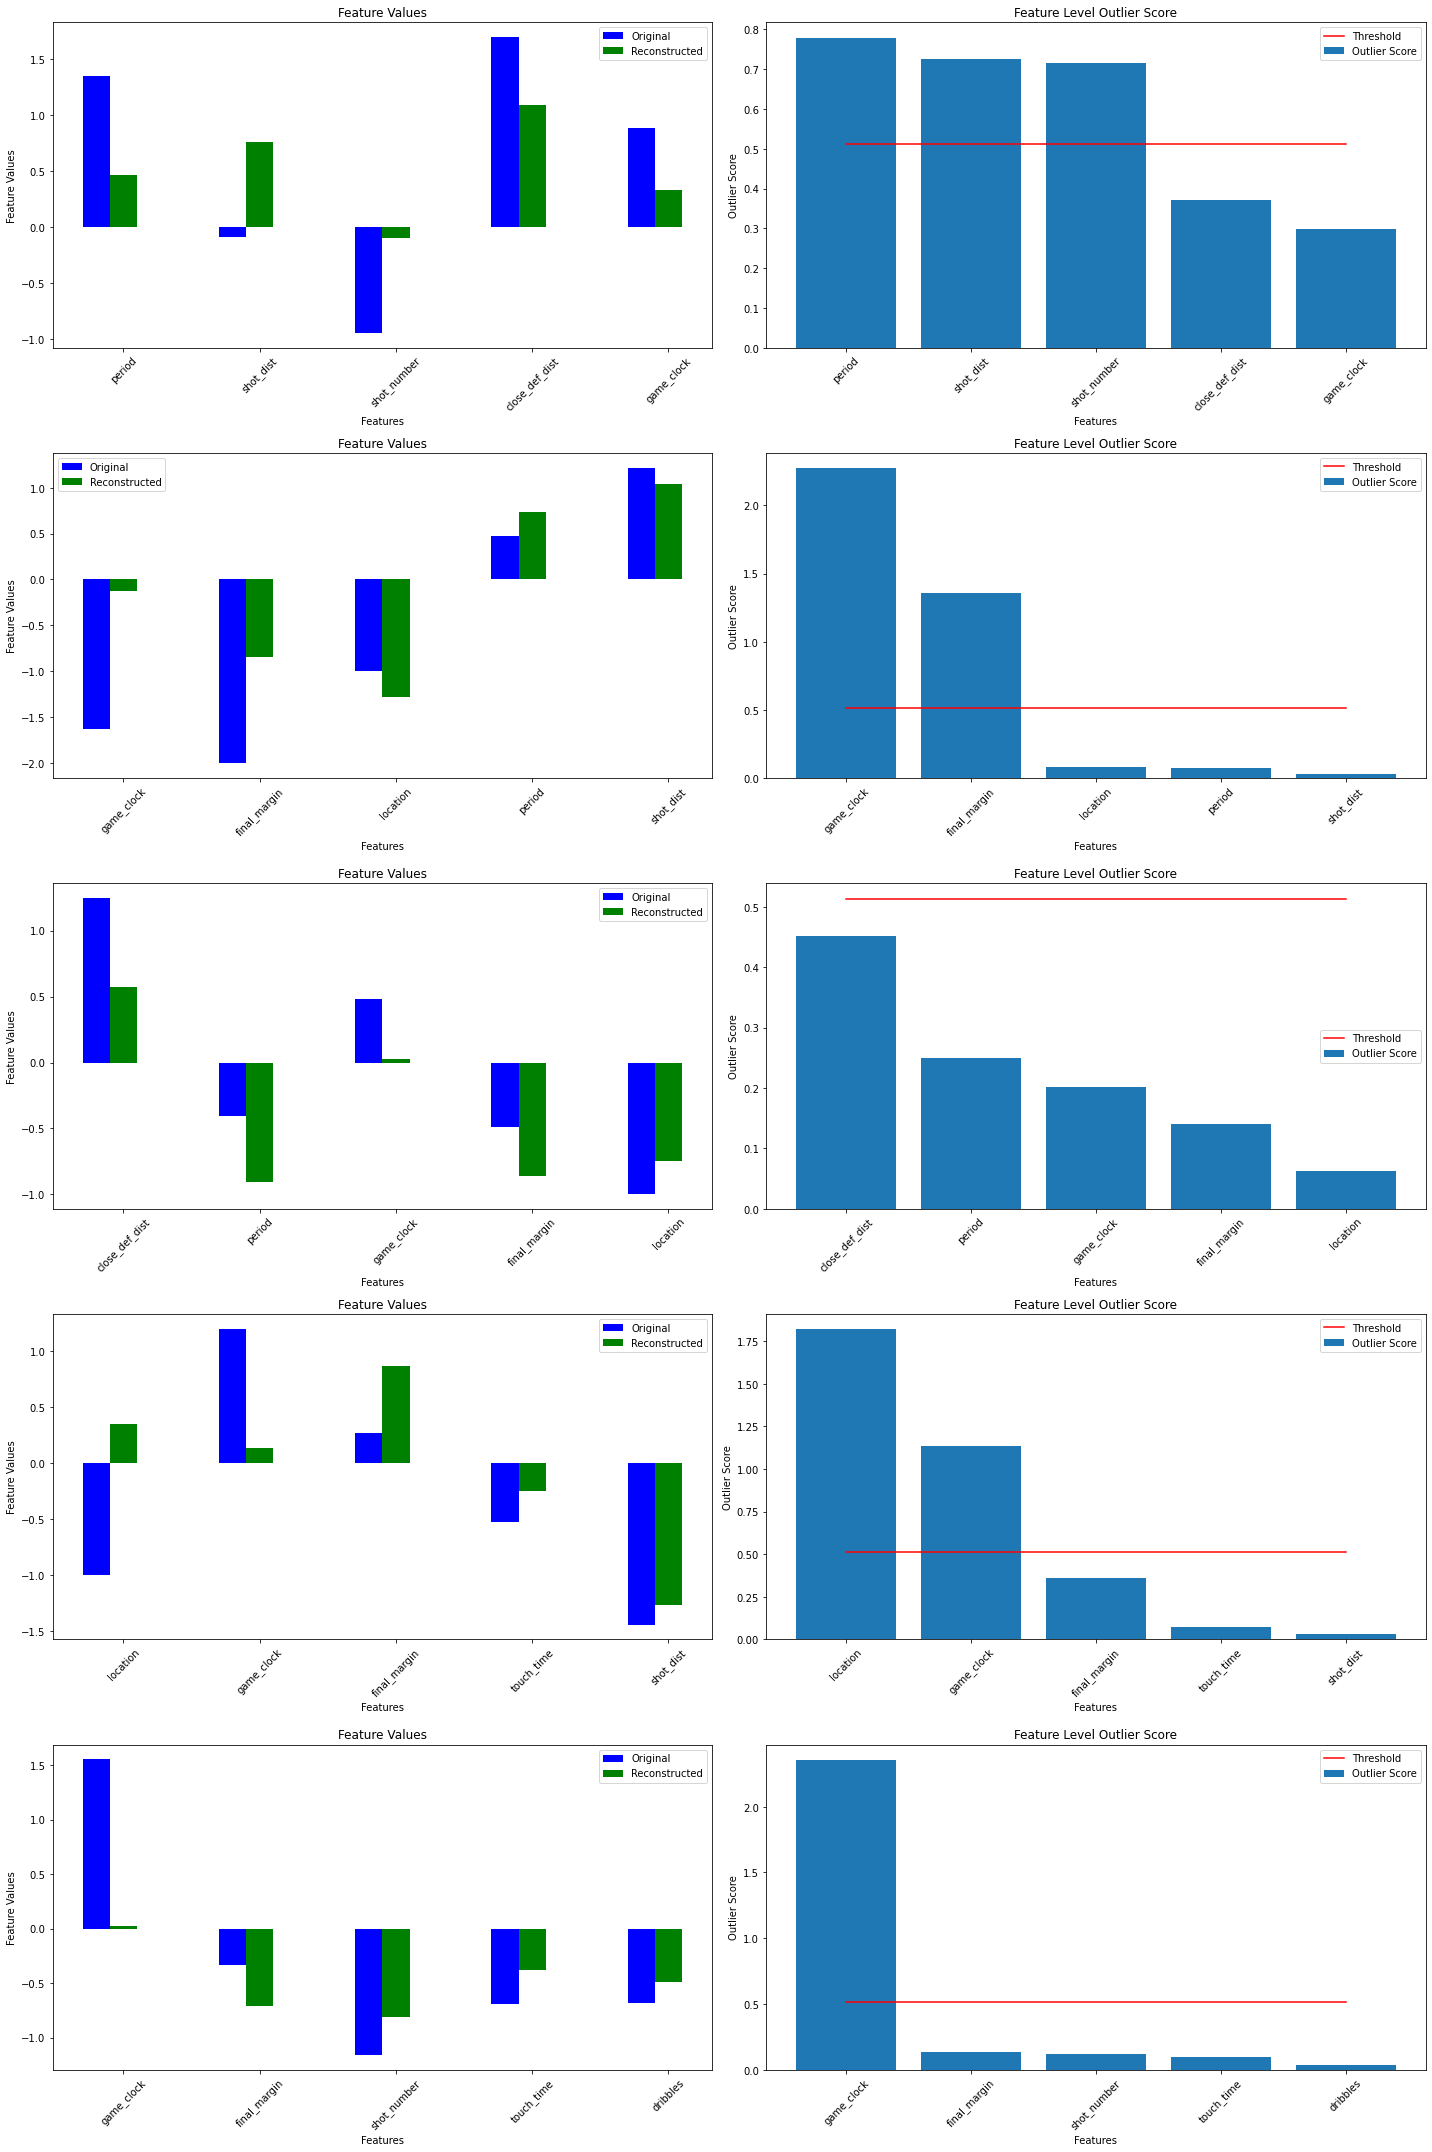

In [113]:
plot_feature_outlier_tabular(od_preds,
                             X_outlier,
                             X_recon=X_recon,
                             threshold=od.threshold,
                             instance_ids=None,  # pass a list with indices of instances to display
                             max_instances=5,  # max nb of instances to display
                             top_n=5,  # only show top_n features ordered by outlier score
                             outliers_only=False,  # only show outlier predictions
                             feature_names=X.columns,  # add feature names
                             figsize=(20, 30))